# Pandas:

## the primary Python tabular data analysis/manipulation toolkit

####Presented by Michael Ripperger

### What is Pandas?

*    Python package
*    Functional toolkit
    *    Organizes data
    *    Manipulates data
    *    Analyzes data


In [1]:
import pandas as pd
import numpy as np

##Speed!
* Built upon Numpy
* Cython core

###First data structure: Series

In [2]:
s = pd.Series([1,2,3,3,4,5,4], index=['a','b','c','d','e','f','g'])
print(s)

a    1
b    2
c    3
d    3
e    4
f    5
g    4
dtype: int64


###Slicing

In [3]:
s[:3]

a    1
b    2
c    3
dtype: int64

In [4]:
(s + s) / 4

a    0.5
b    1.0
c    1.5
d    1.5
e    2.0
f    2.5
g    2.0
dtype: float64

In [5]:
s.get('f')

5

In [6]:
s.get('y', np.nan)

nan

###Second data structure: DataFrame
* Similar to R's data frame
* Does everything Series can do

In [7]:
df = pd.read_csv('brothers.csv', index_col=0)

In [8]:
print(df)

    length_1  breadth_1  length_2  breadth_2
1        191        155       179        145
2        195        149       201        152
3        181        148       185        149
4        183        153       188        149
5        176        144       171        142
6        208        157       192        152
7        189        150       190        149
8        197        159       189        152
9        188        152       197        159
10       192        150       187        151
11       179        158       186        148
12       183        147       174        147
13       174        150       185        152
14       190        159       195        157
15       188        151       187        158
16       163        137       161        130
17       195        155       183        158
18       186        153       173        148
19       181        145       182        146
20       175        140       165        137
21       192        154       185        152
22       1

##Metadata

In [9]:
df.shape

(25, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 4 columns):
length_1     25 non-null int64
breadth_1    25 non-null int64
length_2     25 non-null int64
breadth_2    25 non-null int64
dtypes: int64(4)
memory usage: 1000.0 bytes


In [11]:
df.head()

,length_1,breadth_1,length_2,breadth_2
1,191,155,179,145
2,195,149,201,152
3,181,148,185,149
4,183,153,188,149
5,176,144,171,142


In [12]:
df = pd.DataFrame(
        [df['length_%s' % x] * df['breadth_%s' % x] for x in [1,2]],
            index=['brother 1', 'brother 2']
        )
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
brother 1,29605,29055,26788,27999,25344,32656,28350,31323,28576,28800,...,22331,30225,28458,26245,24500,29568,24882,24464,32899,30970
brother 2,25955,30552,27565,28012,24282,29184,28310,28728,31323,28237,...,20930,28914,25604,26572,22605,28120,26166,25168,31600,28050


In [13]:
df = df.T
df.head()

,brother 1,brother 2
1,29605,25955
2,29055,30552
3,26788,27565
4,27999,28012
5,25344,24282


In [14]:
df = df / 1000
df.head()

,brother 1,brother 2
1,29.605,25.955
2,29.055,30.552
3,26.788,27.565
4,27.999,28.012
5,25.344,24.282


##Boolean indexing

In [15]:
df[df['brother 1'] < df['brother 2']]

,brother 1,brother 2
2,29.055,30.552
3,26.788,27.565
4,27.999,28.012
9,28.576,31.323
13,26.100,28.120
14,30.210,30.615
15,28.388,29.546
19,26.245,26.572
22,24.882,26.166
23,24.464,25.168


In [16]:
df.loc[:,'brother 2 greater?'] = df['brother 1'] < df['brother 2']
df.head()

,brother 1,brother 2,brother 2 greater?
1,29.605,25.955,False
2,29.055,30.552,True
3,26.788,27.565,True
4,27.999,28.012,True
5,25.344,24.282,False


##Sorting

In [17]:
df.sort(columns='brother 1').head()

,brother 1,brother 2,brother 2 greater?
16,22.331,20.930,False
23,24.464,25.168,True
20,24.500,22.605,False
22,24.882,26.166,True
5,25.344,24.282,False


In [18]:
df.sort_index(ascending=False).head()

,brother 1,brother 2,brother 2 greater?
25,30.970,28.050,False
24,32.899,31.600,False
23,24.464,25.168,True
22,24.882,26.166,True
21,29.568,28.120,False


##Iteration

In [19]:
for index, data_series in df.iterrows():
    if index in [1,2]:
        print(index)
        print(data_series)

1
brother 1             29.605
brother 2             25.955
brother 2 greater?     False
Name: 1, dtype: object
2
brother 1             29.055
brother 2             30.552
brother 2 greater?      True
Name: 2, dtype: object


##SQL-like groupby operations

In [20]:
df1 = pd.read_csv('mtcars.csv', index_col=0)
df1

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [21]:
grouped = df1.groupby('cyl')

In [22]:
for group_name, group in grouped:
    print(group_name)
    print(group)

4
                 mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Datsun 710      22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
Merc 240D       24.4    4  146.7   62  3.69  3.190  20.00   1   0     4     2
Merc 230        22.8    4  140.8   95  3.92  3.150  22.90   1   0     4     2
Fiat 128        32.4    4   78.7   66  4.08  2.200  19.47   1   1     4     1
Honda Civic     30.4    4   75.7   52  4.93  1.615  18.52   1   1     4     2
Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1     4     1
Toyota Corona   21.5    4  120.1   97  3.70  2.465  20.01   1   0     3     1
Fiat X1-9       27.3    4   79.0   66  4.08  1.935  18.90   1   1     4     1
Porsche 914-2   26.0    4  120.3   91  4.43  2.140  16.70   0   1     5     2
Lotus Europa    30.4    4   95.1  113  3.77  1.513  16.90   1   1     5     2
Volvo 142E      21.4    4  121.0  109  4.11  2.780  18.60   1   1     4     2
6
                 mpg  cyl   disp   hp  drat     wt   qsec  v

##Plotting with matplotlib

In [23]:
%matplotlib inline

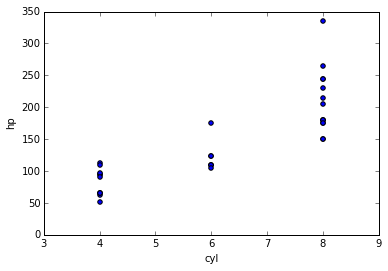

In [24]:
df1.plot(kind='scatter', x='cyl', y='hp')

##Function application

In [25]:
df2 = pd.read_csv('data.csv')
df2

,ACCESSION,AGE_Years,SEX,AA_Interp,Alanine_P,Arginine_P,Aspartic_acid_P,Citrulline_P,Glutamine_P,Glutamic_acid_P,...,Ornithine_P,Phenylalanine_P,Proline_P,Serine_P,Taurine_P,Threonine_P,Tyrosine_P,Valine_P,Homocysteine_P,Cysteine_P
0,9020101689,0.000000,F,Normal,332,79,9,18,612,41,...,74,62,167,177,127,317,57,161,0,53
1,9058109237,0.000000,F,Normal,293,44,7,9,467,63,...,49,46,133,138,138,300,74,152,0,26
2,9161128247,0.000000,M,Normal,437,30,7,18,671,85,...,57,56,231,164,135,205,56,116,0,32
3,9175120582,0.000000,M,Normal,361,32,9,27,487,62,...,100,52,118,136,92,228,55,123,0,37
4,9181544801,0.000000,F,Normal,555,86,10,37,594,90,...,72,47,256,140,91,204,92,263,0,36
5,9224120862,0.000000,M,Normal,251,33,5,13,578,45,...,43,45,205,168,216,232,101,160,0,29
6,9274552153,0.000000,M,Normal,480,15,14,17,640,74,...,61,45,257,159,248,183,61,113,0,43
7,9365109752,0.000000,F,Normal,177,32,7,9,556,58,...,33,67,207,216,305,92,52,107,0,23
8,10054500609,0.000000,M,Normal,247,69,7,27,445,41,...,39,43,81,123,38,99,56,191,0,20
9,10065108843,0.000000,F,Normal,373,41,23,35,610,98,...,59,69,263,179,128,187,81,189,0,41


In [26]:
df2.columns

Index(['ACCESSION', 'AGE_Years', 'SEX', 'AA_Interp', 'Alanine_P', 'Arginine_P',
       'Aspartic_acid_P', 'Citrulline_P', 'Glutamine_P', 'Glutamic_acid_P',
       'Glycine_P', 'Histidine_P', 'Hydroxyproline_P', 'Isoleucine_P',
       'Leucine_P', 'Lysine_P', 'Methionine_P', 'Ornithine_P',
       'Phenylalanine_P', 'Proline_P', 'Serine_P', 'Taurine_P', 'Threonine_P',
       'Tyrosine_P', 'Valine_P', 'Homocysteine_P', 'Cysteine_P'],
      dtype='object')

In [27]:
df3 = pd.read_csv('amino_acids.txt', header=None)
print(df3.head())

                                       0
0                Ala     A       Alanine
1               Arg     R       Arginine
2             Asn     N       Asparagine
3          Asp     D       Aspartic acid
4             Cit     C       Citrulline


In [28]:
import re
df3 = df3.loc[:,0].apply(lambda x: pd.Series(list(filter(None, re.compile('  +').split(x)))))
df3.head()

,0,1,2
0,Ala,A,Alanine
1,Arg,R,Arginine
2,Asn,N,Asparagine
3,Asp,D,Aspartic acid
4,Cit,C,Citrulline


In [29]:
df3.tail()

,0,1,2
22,Trp,W,Tryptophan
23,Tyr,Y,Tyrosine
24,Val,V,Valine
25,Xaa,X,Any amino acid
26,TERM,termination codon,NaN


In [30]:
df3 = df3.iloc[:-1,:]

In [31]:
df3.columns = ['Abbreviation', 'First letter', 'Amino acid']

In [32]:
df3.set_index('Amino acid', inplace=True)

In [33]:
df3.head()

,Abbreviation,First letter
Amino acid,,
Alanine,Ala,A
Arginine,Arg,R
Asparagine,Asn,N
Aspartic acid,Asp,D
Citrulline,Cit,C


In [34]:
print(df3.head())

              Abbreviation First letter
Amino acid                             
Alanine                Ala            A
Arginine               Arg            R
Asparagine             Asn            N
Aspartic acid          Asp            D
Citrulline             Cit            C


In [35]:
def change_names(name):
    if '_P' in name:
        name = df3.loc[name[:-2].replace('_', ' '), 'Abbreviation']
    return name

df2.columns = [change_names(name) for name in df2.columns]

In [36]:
df2.set_index('ACCESSION', inplace=True)
df2.head()

,AGE_Years,SEX,AA_Interp,Ala,Arg,Asp,Cit,Gln,Glu,Gly,...,Orn,Phe,Pro,Ser,Tau,Thr,Tyr,Val,Hcy,Cys
ACCESSION,,,,,,,,,,,,,,,,,,,,,
9020101689,0,F,Normal,332,79,9,18,612,41,347,...,74,62,167,177,127,317,57,161,0,53
9058109237,0,F,Normal,293,44,7,9,467,63,274,...,49,46,133,138,138,300,74,152,0,26
9161128247,0,M,Normal,437,30,7,18,671,85,302,...,57,56,231,164,135,205,56,116,0,32
9175120582,0,M,Normal,361,32,9,27,487,62,356,...,100,52,118,136,92,228,55,123,0,37
9181544801,0,F,Normal,555,86,10,37,594,90,201,...,72,47,256,140,91,204,92,263,0,36


##DataFrame columns are Series

In [37]:
hcy_s = df2.loc[:,'Hcy']
hcy_s.head()

ACCESSION
9020101689    0
9058109237    0
9161128247    0
9175120582    0
9181544801    0
Name: Hcy, dtype: int64

In [38]:
hcy_s.unique()

array([0])

In [39]:
df2 = df2.drop('Hcy', axis=1)
df2.head()

,AGE_Years,SEX,AA_Interp,Ala,Arg,Asp,Cit,Gln,Glu,Gly,...,Met,Orn,Phe,Pro,Ser,Tau,Thr,Tyr,Val,Cys
ACCESSION,,,,,,,,,,,,,,,,,,,,,
9020101689,0,F,Normal,332,79,9,18,612,41,347,...,33,74,62,167,177,127,317,57,161,53
9058109237,0,F,Normal,293,44,7,9,467,63,274,...,21,49,46,133,138,138,300,74,152,26
9161128247,0,M,Normal,437,30,7,18,671,85,302,...,27,57,56,231,164,135,205,56,116,32
9175120582,0,M,Normal,361,32,9,27,487,62,356,...,26,100,52,118,136,92,228,55,123,37
9181544801,0,F,Normal,555,86,10,37,594,90,201,...,36,72,47,256,140,91,204,92,263,36


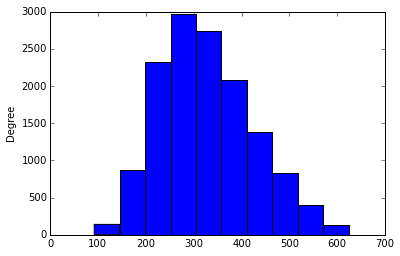

In [40]:
df2.loc[:,'Ala'].plot(kind='hist')

In [41]:
df2.describe()

,AGE_Years,Ala,Arg,Asp,Cit,Gln,Glu,Gly,His,Hyp,...,Met,Orn,Phe,Pro,Ser,Tau,Thr,Tyr,Val,Cys
count,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,13873.000000,...,13873.000000,13873.000000,13870.000000,13873.000000,13873.000000,13873.000000,13873.000000,13870.000000,13873.000000,13873.000000
mean,1.105445,326.839977,70.525337,10.814171,22.640957,554.153968,70.019174,243.505658,93.974915,28.016939,...,26.217184,68.269228,52.744845,193.419952,141.426800,76.562676,136.559720,69.575198,194.570605,26.937865
std,1.115121,96.904859,25.643201,7.195245,9.284156,107.989384,43.717879,68.677978,24.330960,22.161957,...,9.445003,29.802001,12.840800,66.666766,39.858176,38.963828,60.388284,23.746333,61.780048,9.311415
min,0.000000,92.000000,0.000000,0.000000,0.000000,30.000000,8.000000,76.000000,17.000000,0.000000,...,6.000000,15.000000,8.000000,0.000000,47.000000,2.000000,30.000000,7.000000,29.000000,0.000000
25%,0.172484,254.000000,52.000000,6.000000,16.000000,480.000000,42.000000,194.000000,76.000000,13.000000,...,19.000000,47.000000,43.000000,146.000000,116.000000,53.000000,95.000000,52.000000,150.000000,21.000000
50%,0.684462,316.000000,68.000000,9.000000,22.000000,545.000000,59.000000,233.000000,90.000000,25.000000,...,24.000000,62.000000,51.000000,184.000000,134.000000,67.000000,122.000000,65.000000,186.000000,26.000000
75%,1.804243,391.000000,86.000000,13.000000,28.000000,618.000000,85.000000,282.000000,109.000000,41.000000,...,32.000000,83.000000,61.000000,229.000000,157.000000,89.000000,163.000000,84.000000,230.000000,32.000000
max,4.000000,624.000000,190.000000,78.000000,68.000000,959.000000,563.000000,537.000000,271.000000,338.000000,...,65.000000,285.000000,113.000000,751.000000,569.000000,588.000000,687.000000,151.000000,594.000000,94.000000


In [42]:
age_s = df2.loc[:,'AGE_Years']
age_s.max()

4.0

In [43]:
len(list(df2.loc[:,'AGE_Years'].unique()))

1448

In [44]:
df2.loc[:,'AGE_Years'] = age_s.round()
grouped = df2.groupby('AGE_Years')
grouped.count()

,SEX,AA_Interp,Ala,Arg,Asp,Cit,Gln,Glu,Gly,His,...,Met,Orn,Phe,Pro,Ser,Tau,Thr,Tyr,Val,Cys
AGE_Years,,,,,,,,,,,,,,,,,,,,,
0,5922,5922,5922,5922,5922,5922,5922,5922,5922,5922,...,5922,5922,5921,5922,5922,5922,5922,5920,5922,5922
1,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
2,2027,2027,2027,2027,2027,2027,2027,2027,2027,2027,...,2027,2027,2025,2027,2027,2027,2027,2027,2027,2027
3,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543,...,1543,1543,1543,1543,1543,1543,1543,1542,1543,1543
4,609,609,609,609,609,609,609,609,609,609,...,609,609,609,609,609,609,609,609,609,609


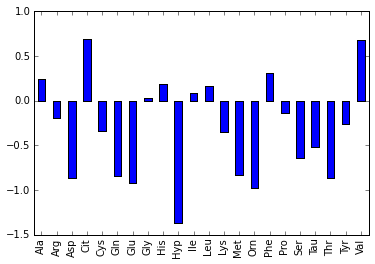

In [45]:
def standard_score(df):
    return (df.mean() - df2.mean()) / df2.std()

df4 = grouped.get_group(4).pipe(standard_score) - \
    grouped.get_group(0).pipe(standard_score)
df4.drop('AGE_Years').plot(kind='bar')

In [46]:
df2.drop(['AGE_Years', 'SEX', 'AA_Interp'], axis=1, inplace=True)
df2.apply(lambda x: x.sum())

Ala    4534251
Arg     978398
Asp     150025
Cit     314098
Gln    7687778
Glu     971376
Gly    3378154
His    1303714
Hyp     388679
Ile     808715
Leu    1541011
Lys    2165406
Met     363711
Orn     947099
Phe     731571
Pro    2683315
Ser    1962014
Tau    1062154
Thr    1894493
Tyr     965008
Val    2699278
Cys     373709
dtype: float64

In [47]:
df2.apply(lambda x: x.sum(), axis=1)

ACCESSION
9020101689     3182
9058109237     2646
9161128247     2975
9175120582     2731
9181544801     3440
9224120862     2748
9274552153     3133
9365109752     2597
10054500609    2135
10065108843    3244
10099121224    3315
10223134328    2678
10266107979    3341
10310300418    2218
10321125435    3075
10351127644    2650
10354112499    2814
11090118522    3335
11174117272    2845
11185105907    2890
11245124770    2402
11315126467    3218
11331104296    2322
12079124994    2600
12123122305    2632
12200131746    3721
12230124486    3615
12236125128    3120
12265105031    3012
13043544813    2597
               ... 
13352109849    2742
9315122955     2702
10048106347    2033
13348108612    2500
12192131427    2523
9117125753     2791
12058131812    3226
13294132313    2523
10160101208    2533
11193117260    2467
9260113090     2622
10134107903    2644
10315131040    2618
11361301446    2382
11362300162    2541
12004133840    2274
11286115881    2183
13091127554    1974
1315010406

In [48]:
df2.applymap(lambda x: np.exp(x)).head()

,Ala,Arg,Asp,Cit,Gln,Glu,Gly,His,Hyp,Ile,...,Met,Orn,Phe,Pro,Ser,Tau,Thr,Tyr,Val,Cys
ACCESSION,,,,,,,,,,,,,,,,,,,,,
9020101689,1.533797e+144,2.038281e+34,8103.083928,6.565997e+07,6.140771e+265,6.398435e+17,5.014010e+150,1.084464e+46,9.744803e+09,4.727839e+18,...,2.146436e+14,1.373383e+32,8.438357e+26,3.366499e+72,7.415207e+76,1.430208e+55,4.691922e+137,5.685720e+24,8.344716e+69,1.041376e+23
9058109237,1.771264e+127,1.285160e+19,1096.633158,8.103084e+03,6.539176e+202,2.293783e+27,9.924029e+118,3.637971e+42,3.269017e+06,4.311232e+15,...,1.318816e+09,1.907347e+21,9.496119e+19,5.769871e+57,8.563248e+59,8.563248e+59,1.942426e+130,1.373383e+32,1.029820e+66,1.957296e+11
9161128247,6.119115e+189,1.068647e+13,1096.633158,6.565997e+07,2.579867e+291,8.223013e+36,1.435270e+131,6.663176e+40,2.146436e+14,1.784823e+08,...,5.320482e+11,5.685720e+24,2.091659e+24,2.099062e+100,1.676081e+71,4.263390e+58,1.072430e+89,2.091659e+24,2.388691e+50,7.896296e+13
9175120582,6.029870e+156,7.896296e+13,8103.083928,5.320482e+11,3.172581e+211,8.438357e+26,4.062895e+154,1.506097e+35,3.931334e+12,9.744803e+09,...,1.957296e+11,2.688117e+43,3.831008e+22,1.765017e+51,1.158910e+59,9.017628e+39,1.045062e+99,7.694785e+23,2.619517e+53,1.171914e+16
9181544801,1.080034e+241,2.235247e+37,22026.465795,1.171914e+16,9.352382e+257,1.220403e+39,1.964223e+87,1.935576e+54,4.311232e+15,1.220403e+39,...,4.311232e+15,1.858672e+31,2.581313e+20,1.511428e+111,6.327432e+60,3.317400e+39,3.945248e+88,9.017628e+39,1.657482e+114,4.311232e+15


##Concatenation

In [49]:
data = pd.read_csv('HairEyeColor.csv', index_col=0)
data.head()

,Hair,Eye,Sex,Freq
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11


In [50]:
df5 = data.loc[:,['Eye', 'Sex', 'Freq']][2:6]
df6 = data.loc[:,['Hair', 'Eye']][4:8]
df5

,Eye,Sex,Freq
3,Brown,Male,10
4,Brown,Male,3
5,Blue,Male,11
6,Blue,Male,50


In [51]:
df6

,Hair,Eye
5,Black,Blue
6,Brown,Blue
7,Red,Blue
8,Blond,Blue


In [52]:
df5 = pd.concat([df5,df6])
df5

,Eye,Freq,Hair,Sex
3,Brown,10,NaN,Male
4,Brown,3,NaN,Male
5,Blue,11,NaN,Male
6,Blue,50,NaN,Male
5,Blue,NaN,Black,NaN
6,Blue,NaN,Brown,NaN
7,Blue,NaN,Red,NaN
8,Blue,NaN,Blond,NaN


##Handling missing data

In [53]:
df5['Freq'].sum()

74.0

In [54]:
df5.dropna(how='all', subset=['Freq', 'Sex'])

,Eye,Freq,Hair,Sex
3,Brown,10,NaN,Male
4,Brown,3,NaN,Male
5,Blue,11,NaN,Male
6,Blue,50,NaN,Male


##Database-style merging
* Built for speed

In [55]:
database = pd.read_csv('database.csv')
df7 = database.loc[:,['first_name', 'last_name', 'city', 'state']][2:6].reset_index(drop=True)
df8 = database.loc[:,['first_name', 'last_name', 'zip']][4:8].reset_index(drop=True)
df7

,first_name,last_name,city,state
0,Art,Venere,Bridgeport,NJ
1,Lenna,Paprocki,Anchorage,AK
2,Donette,Foller,Hamilton,OH
3,Simona,Morasca,Ashland,OH


In [56]:
df8

,first_name,last_name,zip
0,Donette,Foller,45011
1,Simona,Morasca,44805
2,Mitsue,Tollner,60632
3,Leota,Dilliard,95111


In [57]:
df7.merge(df8, how='outer', on=['first_name', 'last_name'])

,first_name,last_name,city,state,zip
0,Art,Venere,Bridgeport,NJ,NaN
1,Lenna,Paprocki,Anchorage,AK,NaN
2,Donette,Foller,Hamilton,OH,45011
3,Simona,Morasca,Ashland,OH,44805
4,Mitsue,Tollner,NaN,NaN,60632
5,Leota,Dilliard,NaN,NaN,95111


In [58]:
df7.merge(df8, how='left', on=['first_name', 'last_name'])

,first_name,last_name,city,state,zip
0,Art,Venere,Bridgeport,NJ,NaN
1,Lenna,Paprocki,Anchorage,AK,NaN
2,Donette,Foller,Hamilton,OH,45011
3,Simona,Morasca,Ashland,OH,44805


In [59]:
df7.merge(df8, how='right', on=['first_name', 'last_name'])

,first_name,last_name,city,state,zip
0,Donette,Foller,Hamilton,OH,45011
1,Simona,Morasca,Ashland,OH,44805
2,Mitsue,Tollner,NaN,NaN,60632
3,Leota,Dilliard,NaN,NaN,95111


In [60]:
df7.merge(df8, how='inner', on=['first_name', 'last_name'])

,first_name,last_name,city,state,zip
0,Donette,Foller,Hamilton,OH,45011
1,Simona,Morasca,Ashland,OH,44805


#Pandas vs. R

###R's c

In [61]:
s_df = pd.DataFrame(np.random.randn(4, 3), columns=list('abc'))
s_df[['a', 'c']]

,a,c
0,-0.335175,0.092877
1,-0.122592,-0.336803
2,1.262740,-2.169056
3,0.638697,0.761669


###Aggregation

In [62]:
s_df = pd.DataFrame({
    'v1': [1,3,5,7,8,3,5,np.nan,4,5,7,9],
    'v2': [11,33,55,77,88,33,55,np.nan,44,55,77,99],
    'by1': ["red", "blue", 1, 2, np.nan, "big", 1, 2, "red", 1, np.nan, 12],
    'by2': ["wet", "dry", 99, 95, np.nan, "damp", 95, 99, "red", 99, np.nan,
           np.nan]
    })
s_df

,by1,by2,v1,v2
0,red,wet,1,11
1,blue,dry,3,33
2,1,99,5,55
3,2,95,7,77
4,NaN,NaN,8,88
5,big,damp,3,33
6,1,95,5,55
7,2,99,NaN,NaN
8,red,red,4,44
9,1,99,5,55


In [63]:
s_df.groupby(['by1','by2']).mean()

v1  v2
by1  by2         
1    95     5  55
     99     5  55
2    95     7  77
     99   NaN NaN
big  damp   3  33
blue dry    3  33
red  red    4  44
     wet    1  11

###R's %in%

In [64]:
s = pd.Series(np.arange(5),dtype=np.float32)
s.isin([2, 4])

0    False
1    False
2     True
3    False
4     True
dtype: bool

###R's match

In [65]:
pd.Series(pd.match(s, [2,4], np.nan))

0   NaN
1   NaN
2     0
3   NaN
4     1
dtype: float64

###R's tapply

In [66]:
import random, string
baseball = pd.DataFrame({
    'team': ["team %d" % (x+1) for x in range(5)]*5,
    'player': random.sample(list(string.ascii_lowercase),25),
    'batting avg': np.random.uniform(.200, .400, 25)
    })
baseball.head()

,batting avg,player,team
0,0.328316,p,team 1
1,0.218720,k,team 2
2,0.371300,b,team 3
3,0.289187,v,team 4
4,0.242803,w,team 5


In [67]:
baseball.pivot_table(values='batting avg', columns='team', aggfunc=np.max)

team
team 1    0.356478
team 2    0.399268
team 3    0.385549
team 4    0.300849
team 5    0.389789
Name: batting avg, dtype: float64

###R's subset

In [68]:
s_df = pd.DataFrame({'a': np.random.randn(10), 'b': np.random.randn(10)})
#s_df.query('a <= b')
s_df[s_df.a <= s_df.b]

,a,b
1,-1.193466,0.703511
4,-1.208578,1.187422
6,-0.741790,-0.125572
9,-3.327805,0.599588


###R's with

In [69]:
#s_df.eval('a + b')
s_df.a + s_df.b

0    1.576161
1   -0.489955
2    1.321139
3   -0.435031
4   -0.021156
5   -1.244591
6   -0.867362
7    0.622398
8    1.777159
9   -2.728216
dtype: float64

##rpy2: R data frame support

In [70]:
from rpy2.robjects import r, pandas2ri
df_iris = pandas2ri.ri2py(r['iris'])
df_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##Final comparison

* ###Pandas + Python
    * General-purpose programming language
    * Strong object-oriented capabilities
    * SciPy - library of scientific computing routines
    * scikit-learn - machine learning toolkit
* ###R
    * Very large library of statistical functions
    * Large statistics-oriented support base
    * Older thus wiser